# 4. Généralisation du code

In [1]:
# argument : un fichier csv
# sortie (en return) : un dataframe
def conversion(fichier):
    # on met dans data un dataframe qui lit le csv, qu on trie par la colonne timestamp
    data = pd.DataFrame(pd.read_csv(fichier)).sort_values(by=['timestamp'],ignore_index=True)
        
    return data

# argument : un dataframe
# cette fonction reagira en fonction de 3 contextes :
#  -contexte 1 : dans le df aucune variable n a timestamp dans son nom -> on affiche ca et on change rien
#  -contexte 2 : dans le df il y a une variable timestamp et aucune autre variable avec timestamp dans son nom -> on affiche ca et on change rien
#  -contexte 3 : dans le df il y a une variable timestamp et une 2e variable avec timestamp dans son nom - > on affiche ca et on supprime cette 2e variable
# elle sortira un dataframe modifié et une description des changements
# sortie (en return) :
#  [0] : un string
#  [1] : un dataframe 
def comparaison_timestamp_timestamp2(data):
    import pandas as pd
    import numpy as np
    
    # on cree une liste vide où on mettra les colonnes qu on voudra supprimer
    colonnes_a_supprimer=[]
    # on initialise une variable string timestamp vide 
    timestamp2=""
    
    # pour chaque colonne dans les colonnes du df
    for colonne in data.columns :
        
        # on initialise une variable string sortie qui dit ça
        sortie = "Il n y a pas de variables avec le mot timestamp dans les colonnes du dataframe, noms : "
        # on initialise une variable string sortie_fin vide 
        sortie_fin=""
        
        # si il y a une colonne qui s'appelle timestamp
        if "timestamp" == colonne :
            
            # alors on efface la variable sortie 
            sortie ="" 
            
            # et pour chaque colonne2 dans les colonnes de data
            for colonne2 in data.columns :
                
                # si on le mot timestamp_sample ou time_utc_usec dans le nom de la colonne
                if (("timestamp_sample" in colonne2) or ("time_utc_usec" in colonne2)) :
                    
                    # alors dans la variable timestamp2 on met " : " et le nom de cette colonne2
                    timestamp2=" : "+colonne2
                    
                    # et  sortie devient le texte suivant
                    sortie = "Il y a une variable qui s appelle timestamp et une 2e variable avec le mot timestamp dans les colonnes du dataframe : "
                    
                    # si toutes les valeurs de colonne2 son inferireures à celles de colonne
                    # (si la seule valeur dans la comparaison colonne2<colonne est True)
                    if np.unique(data[colonne2]<data[colonne]):
                        
                        # alors on met ça dans la variable sortie_fin
                        sortie_fin = " .\n"+colonne2+" est toujours plus petite que timestamp"
                        
                    # sinon (si colonne2<colonne pas à 100% vrai)
                    else:
                        
                        # alors on met ça dans la variable sortie_fin
                        sortie_fin = " .\n"+colonne2+" plus petite que timestamp " + len((data[colonne2]<data[colonne])==True)+" fois"+" et plus grosse ou egale que timestamp " + len((data[colonne2]<data[colonne])==False)+" fois"
                    
                    # on met la colonne2 à supprimer à la fin de la liste des colonnes_a_supprimer
                    colonnes_a_supprimer.append(colonne2)

                    # on arrete le if qui cherche une variable avec dans son nom timestamp_sample ou time_utc_usec
                    break
                    
                # sinon (si pas de variable avec dans son nom timestamp_sample ou time_utc_usec)
                else :
                    
                    # alors la sortie devient le texte suivant
                    sortie = "Il n y a pas d autre variable timestamp dans les colonnes du dataframe : \n"
                    
            # on arrete le if qui cherche les mots précisés 
            break
            
    # on met dans sortie :
    #  ce qu on a deja mis dedans,
    #  la liste des colonnes
    #  le nom de timestamp2
    #  sortie_fin
    sortie= sortie + ", ".join(data.columns) +timestamp2 + ""+sortie_fin +"\n"
    
    # on enleve à data les colonnes_a_supprimer
    data=data.drop(colonnes_a_supprimer, axis=1)
    
    return sortie, data
    

# argument : un dataframe
# cette fonction va supprimer toutes les variables qui ont certains mots renseignes
# on a garde seulement les mots à supprimer "integral"  "event"
# elle affichera les colonnes supprimees ou "Aucun changement" sinon 
# sortie (en return) :
#  [0] : un string
#  [1] : un dataframe 
def suppression_variables_mot(data) :
    sortie=""
    colonnes_a_supprimer=[]
    
    # pour chaque colonne danes les colonnes de data
    for colonne in data.columns :  
        
        # si il y a le mot integral ou event dans le nom de colonne
        if "integral" in colonne or "event" in colonne:
            
            # alors on met cette colonne dans la liste des colonnes_a_supprimer
            colonnes_a_supprimer.append(colonne)
    
    # si il n y a aucune colonne à supprimer
    if len(colonnes_a_supprimer)==0:
        
        # on met ça dans sortie 
        sortie="Aucun changement."
        
    # sinon (si des colonnes à supprimer)
    else: 
        
        # on met dans sortie :
        #  ce qu il y avait deja
        #  et la liste des colonnes_a_supprimer
        sortie=sortie+ ", ".join(colonnes_a_supprimer)
        
    # on supprimer ces colonnes
    data=data.drop(colonnes_a_supprimer, axis=1)
    
    return sortie, data

# argument : un dataframe
# cette fonction supprime toutes les variables qui ont trop peu de valeurs differentes 
# (on a choisi moins de 3)
# elle affichera les colonnes supprimees puis les colonnes restants avec leurs nombres de valeurs differentes 
# sortie (en return) :
#  [0] : un string
#  [1] : un dataframe 
def suppression_variables_peu_de_valeurs(data) :
    sortie=" "
    colonnes_a_supprimer=[]
    
    # pour chaque colonne dans les colonnes de data
    for colonne in data.columns :
        # si le nombre de valeurs differentes dedans ou si que des nan
        if len(np.unique(data[colonne])) <= 3 or  np.unique(np.isnan(data[colonne])):
            
            # alors on ajoute cette colonne a la liste des colonnes_a_supprimer
            colonnes_a_supprimer.append(colonne)
            
            # on met une ligne dans sortie qui décrit le nombre de valeurs differentes de la variable supprimee
            sortie = sortie +"\nLa variable "+colonne+" avait "+ str(len(np.unique(data[colonne]))) +" valeur(s) differente(s)."

    # on enleve à data ces colonnes
    data=data.drop(colonnes_a_supprimer, axis=1)
    
    # on rajoute à sortie ça :
    sortie = sortie+ "\nDistribution de chaque colonne restante :"
    
    # pour chaque colonne dans les colonnes de data
    for colonne in data.columns:
        
        # on met une ligne dans sortie qui décrit le nombre de valeurs differentes de la variable supprimee
        sortie = sortie +"\nLa variable "+colonne+" a "+ str(len(np.unique(data[colonne]))) +" valeurs differentes."
    
    return sortie, data
    

# argument : un dataframe
# cette fonction lance les differentes precedentes fonctions de tris :
#  - comparaison_timestamp_timestamp2
#  - suppression_variables_mot
#  - suppression_variables_peu_de_valeurs
# sortie (en return) :
#  [0] : un string
#  [1] : un dataframe 
def tri_total(data):

    # on met dans sortie 
    sortie="\nEtape de verification de variable(s) timestamp :\n"+(comparaison_timestamp_timestamp2(data)[0])
    data=comparaison_timestamp_timestamp2(data)[1]

    sortie=sortie+"\n\nEtape de suppression de variable(s) qui ont certains noms :\n"
    sortie=sortie+suppression_variables_mot(data)[0]
    data=suppression_variables_mot(data)[1]
    
    sortie=sortie+"\n\nEtape de suppression de variable(s) qui ont trop peu de valeurs differentes :"
    sortie=sortie+suppression_variables_peu_de_valeurs(data)[0]
    data=suppression_variables_peu_de_valeurs(data)[1]
    
    
    return sortie, data

In [2]:
import pandas as pd
import numpy as np
for tableau in ["ulog_scheduler_0.csv",
                "ulog_sensor_combined_0.csv", 
                "ulog_vehicle_magnetometer_0.csv",
                "ulog_vehicle_gps_position_0.csv",
                "ulog_vehicle_air_data_0.csv"] :
    if __name__ == "__main__":
        print("\n",str(tableau), " originel :")
        data=conversion(tableau)
        print("\nColonnes originelles :\n", data.columns)
        sortie =tri_total(data)[0]
        print(sortie)
        data=tri_total(data)[1]
        print("\n",str(tableau), " final (head) :")
        print(data.head())
        print("\nColonnes finales :\n", data.columns)


 ulog_scheduler_0.csv  originel :

Colonnes originelles :
 Index(['timestamp', 'xtime', 'event'], dtype='object')

Etape de verification de variable(s) timestamp :
Il n y a pas d autre variable timestamp dans les colonnes du dataframe : 
timestamp, xtime, event


Etape de suppression de variable(s) qui ont certains noms :
event

Etape de suppression de variable(s) qui ont trop peu de valeurs differentes : 
Distribution de chaque colonne restante :
La variable timestamp a 70395 valeurs differentes.
La variable xtime a 1012 valeurs differentes.

 ulog_scheduler_0.csv  final (head) :
   timestamp  xtime
0   15101432    194
1   15101629     60
2   15101692    117
3   15102433     32
4   15104433    173

Colonnes finales :
 Index(['timestamp', 'xtime'], dtype='object')

 ulog_sensor_combined_0.csv  originel :

Colonnes originelles :
 Index(['timestamp', 'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]',
       'gyro_integral_dt', 'accelerometer_timestamp_relative',
       'accelerometer_m_s2[0]'

Distribution de chaque variable du fichier ulog_vehicle_magnetometer_0.csv


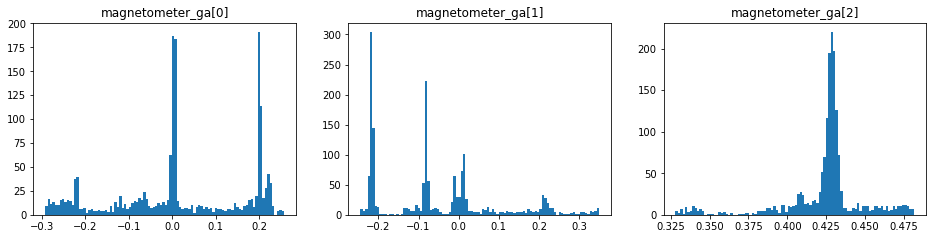

Distribution de chaque variable du fichier ulog_vehicle_gps_position_0.csv


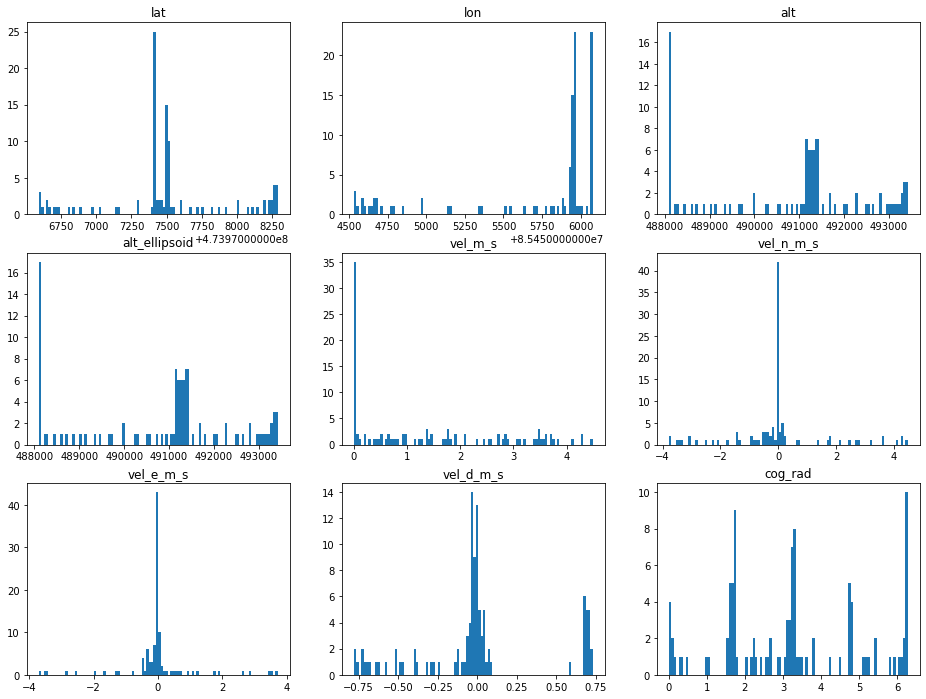

Distribution de chaque variable du fichier ulog_vehicle_air_data_0.csv


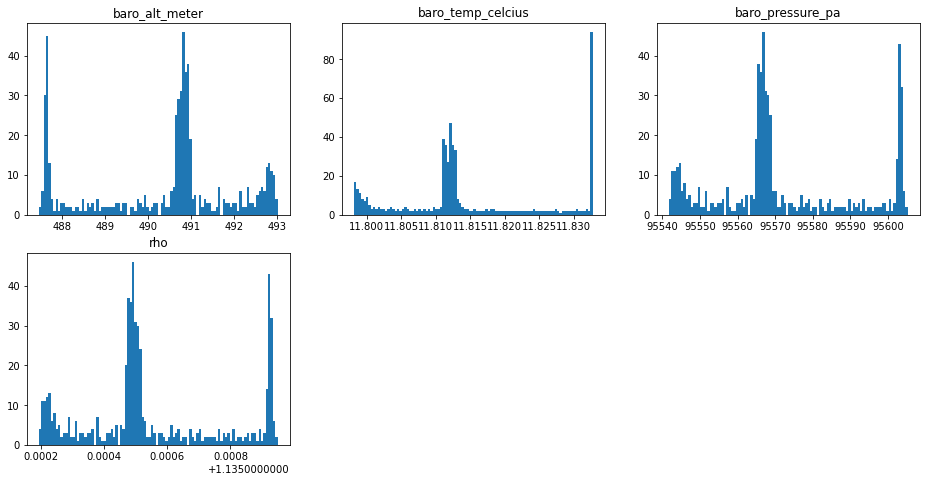

In [3]:
#Histogramme par variable
import matplotlib.pyplot as plt
import numpy as np

for tableau in ["ulog_vehicle_magnetometer_0.csv",
                "ulog_vehicle_gps_position_0.csv",
                "ulog_vehicle_air_data_0.csv"] :
    data=tri_total(conversion(tableau))[1].drop(["timestamp"], axis=1)

    print("Distribution de chaque variable du fichier",tableau)

    place=0
    plt.figure(figsize=(16,12))
    for colonne in data.columns :
        place=place+1
        plt.subplot(3,3,place)
        plt.hist(np.array(data[colonne]),bins=100)
        plt.title(colonne)
    plt.show()

In [4]:
# arguments :
#  un dataframe (avec des xtime)
#  un dataframe (avec des données senrielles)
# cette fonction va concatener le fichier ulog_scheduler_0.csv avec un autre fichier passé en argument
# elle va permettre de faire correspondre des xtime avec des lignes de donnees en alignant des timestamp (differents)
# sortie (en return) : un dataframe
def concatenation(data_fichier_xtimes, data_fichier2):
    import pandas as pd
    import numpy as np
    
    # on met dans un objet data la concatenation de ulog_scheduler_0 avec le fichier csv passe en argument
    # les 2 fichiers seront concatenes l un au dessus l autre
    # mais ensuite on les trie par la variable timestamp dans l'ordre croissant
    # on ne met pas de variable en index
    
    data = pd.concat([data_fichier_xtimes, data_fichier2]).sort_values(by=['timestamp'], ignore_index=True)
    
    # on va chercher la premiere variable qui n a ni xtime ni timestamp dans son nom
    #  pour chaque colonne dans les colonnes de data
    for colonne in data.columns :
        # si on a ni le mot timestamp ni le mot xtime dans le nom de la colonne
        if ("timestamp" in colonne or "xtime" in colonne)==False :
            # alors on met dans la variable choix_variable cette variable
            choix_variable=colonne
            # on arrete la boucle des que ça arrive
            break
    
    # il faut mettre la variable timestamp dans une variable à part, qu'on va mettre en format numpy, sinon ça bug
    A=data["timestamp"].to_numpy()
    
    # pour chaque n°j jusqu a la fin de data
    for j in range(len(data)-1):
        
        # si dans une ligne n°j, sa variable ("choix_variable" choisie precedemment) n est pas vide
        #  et si sa ligne suivante (n°j+1) est vide
        if np.isnan(data[choix_variable][j]) == False and np.isnan(data[choix_variable][j+1]) == True:
            # alors on remplace le timestamp (dans A) de cette ligne (n°j+1) par le timestamp de la ligne n°j
            A[j+1] =A[j]
            
    
    # et donc on remet cette variable A (avec les timestamp changés) a la place de timestamp dans data
    data["timestamp"]=A
    
    # pour chaque groupe de timestamps egaux on garde seulement le premier, on supprime le reste
    #  on enleve l index
    data = data.groupby(['timestamp']).min().dropna().reset_index(inplace=False, 
                                                                  drop=True)
        
    # ces 2 etapes precedentes ont permis d ajouter un xtime aux lignes sans xtime
    #  c est a dire dans les lignes issues du tableau sans xtime on a mis le xtime de la ligne suivante 
    #   (les lignes ont ete rangee dans l ordre coissant des timestamp)
    
    return data

# cette fonction va supprimer la variable nommee timestamp dans le data de concatenation car on en a plus besoin
# elle retourne un dataframe
def suppression_timestamp(data):
    # suppression de colonne(s) avec le mot timestamp dans le nom   
    for colonne in data.columns :    
        if ("timestamp" in colonne)==True :
            data=data.drop(colonne, axis=1)
            
    return data

# cette fonction normalise les donnees sauf xtime (la premiere colonne) entre 0 et 1
# elle retourne un dataframe
def normalisation(data):
    from sklearn import preprocessing
    import pandas as pd
    
    # on met dans un objet (type pandas.core.indexes.base.Index) les colonnes de base
    col=data.columns
    
    # on met dans mms le modele MinMaxScaler de normalisation, une normalisation de 0 à 1
    mms=preprocessing.MinMaxScaler(feature_range=(0,1))
    
    # on applique ce modele de normalisation à partir de la 2 colonne jusqu'à la derniere et on remplace dans data
    data.values[:,1:]=mms.fit_transform(data.values[:,1:])
    
    # on remet data en dataframe en precisant en noms de colonnes les colonnes de base
    data=pd.DataFrame(data,columns=col)

    return (data)

In [5]:
# pour chaque fichier parmi eux
for fichier in ["ulog_sensor_combined_0.csv", 
                "ulog_vehicle_magnetometer_0.csv",
                "ulog_vehicle_gps_position_0.csv",
                "ulog_vehicle_air_data_0.csv"] :
    
    if __name__ == "__main__":
        
        # on print le nom du fichier
        print("\n",str(fichier), " :")
        
        # on met dans data la concatenation du fichier avec ulog_scheduler_0.csv
        data=concatenation(tri_total(conversion("ulog_scheduler_0.csv"))[1],
                           tri_total(conversion(fichier))[1])
        
        # on lui supprime ses timestamp
        data=suppression_timestamp(data)
        
        # on normalise les colonnes (sauf xtime)
        data=normalisation(data)
        
        print("Head : \n")
        print(data.head())


 ulog_sensor_combined_0.csv  :
Head : 

   xtime  gyro_rad[0]  gyro_rad[1]  gyro_rad[2]  accelerometer_m_s2[0]  \
0   16.0     0.539389     0.628170     0.501068               0.464922   
1   50.0     0.539565     0.629149     0.500877               0.464798   
2  174.0     0.538653     0.628641     0.500543               0.464794   
3   19.0     0.536090     0.626586     0.500711               0.465495   
4  167.0     0.538545     0.627787     0.501683               0.464896   

   accelerometer_m_s2[1]  accelerometer_m_s2[2]  
0               0.542967               0.974114  
1               0.553677               0.974372  
2               0.556481               0.974337  
3               0.545574               0.974302  
4               0.533710               0.974070  

 ulog_vehicle_magnetometer_0.csv  :
Head : 

   xtime  magnetometer_ga[0]  magnetometer_ga[1]  magnetometer_ga[2]
0   68.0            0.900367            0.271028            0.653863
1  167.0            0.896215  

In [7]:
import pandas as pd
import numpy as np
def decoupage_event(data): 
    
    for j in range (len(data["event"])) :       
        data["event"][j] = repr(data["event"][j])[-1]
    
    data_events={}
    
    for i in np.unique(data.values[:,2]):        
        data_events["data_event_{0}".format(i)]= data[data.values[:,2]==i]
        
    data_events.pop("data_event_9")
    
    return data_events

    
print(decoupage_event(conversion("ulog_scheduler_0.csv")).keys())

dict_keys(['data_event_0', 'data_event_1', 'data_event_2', 'data_event_3', 'data_event_4', 'data_event_5', 'data_event_6', 'data_event_7', 'data_event_8', 'data_event_9'])


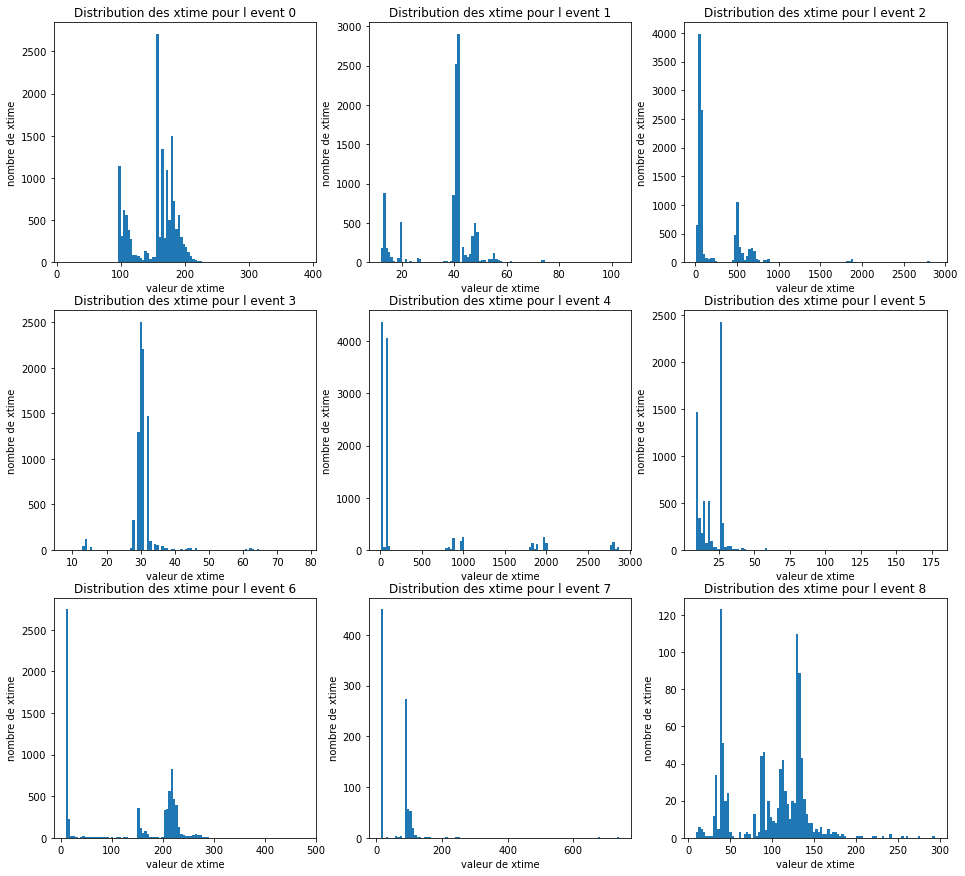

In [14]:
# Representation histogramme des la distribution des xtimes 
def histogramme(data):
    import matplotlib.pyplot as plt

    plt.hist(np.array(data["xtime"]),bins=100)
    plt.xlabel("valeur de xtime")
    plt.ylabel("nombre de xtime")


if __name__ == "__main__":
    
    import matplotlib.pyplot as plt
    
    data_events=decoupage_event(conversion("ulog_scheduler_0.csv"))
    plt.figure(figsize=(16,15))

    
    for i in (0,1,2,3,4,5,6,7,8) :
        
        data=data_events["".join(["data_event_",str(i)])]
        place=i+1
        
        plt.subplot(3,3,place)
        histogramme(data)
        plt.title("".join(["Distribution des xtime pour l event ",str(i)]))
    
    plt.show()
    


In [15]:
def concatenation_2_fichiers(data_event):
    # concatenation des 4 fichiers de donnees sensorielles (avec timestamp, sans xtime)
    data_fichiers=pd.concat([tri_total(conversion("ulog_sensor_combined_0.csv"))[1],
                              tri_total(conversion("ulog_vehicle_gps_position_0.csv"))[1],
                              tri_total(conversion("ulog_vehicle_air_data_0.csv"))[1],
                              tri_total(conversion("ulog_vehicle_magnetometer_0.csv"))[1]]).sort_values(by=['timestamp'], 
                                                                                                        ignore_index=True)

    # donnees nettoyees :
    data_fichiers=comparaison_timestamp_timestamp2(data_fichiers)[1]
    data_fichiers=suppression_variables_mot(data_fichiers)[1]

    # concatenation avec un fichier avec xtime (et timestamp)
    # la fonction concatenation() ne fonctionne pas, il a fallu la changer comme ci-dessous :
    data_concat = pd.concat([tri_total(data_events[data_event])[1], data_fichiers]).sort_values(by=['timestamp'], ignore_index=True)
    for colonne in data_concat.columns :
        # si on a ni le mot timestamp ni le mot xtime dans le nom de la colonne
        if ("timestamp" in colonne or "xtime" in colonne)==False :
                # alors on met dans la variable choix_variable cette variable
            choix_variable=colonne
                # on arrete la boucle des que ça arrive
            break

    A=data_concat["timestamp"].to_numpy()

    for j in range(len(data_concat)-1):

        if np.isnan(data_concat[choix_variable][j]) == False and np.isnan(data_concat[choix_variable][j+1]) == True:
            A[j+1] =A[j]

    data_concat["timestamp"]=A
    data_concat = data_concat.groupby(['timestamp']).min().reset_index(inplace=False,drop=True)

    # normalisation (sauf des xtimes)
    data_concat.iloc[ : , 1:]=normalisation(data_concat.iloc[ : , 1:])

    # remplir les NA par la derniere valeur, puis supprimer les premieres NA :
    data_concat=data_concat.fillna(method='ffill')
    data_concat=data_concat.dropna()

    return data_concat


1 168473.69107983296
2 156733.68949995426
3 156756.66387716617
4 156275.6828272006
5 149117.64179064677
6 146702.87802714188
7 150828.00446792264
8 152531.35469339017
9 147887.23719819024


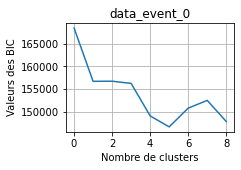

1 111087.23258331996
2 100582.31201058911
3 81422.23125009093
4 79546.25540752793
5 75503.51473518301
6 74553.82791795183
7 62066.239538050686
8 19624.0943183455
9 19642.740353482284


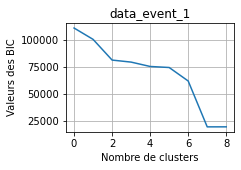

1 199450.57500845168
2 152752.57928772445
3 153589.48947388004
4 153375.63157656483
5 145432.76712439998
6 144963.4780053511
7 157454.3415348309
8 140775.8027128225
9 140299.94122344474


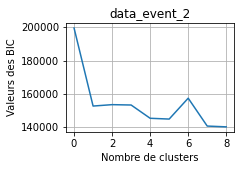

1 76162.49221286032
2 51087.92644823172
3 50458.19065892674
4 50355.73962078692
5 50420.668689079605
6 50397.69997656344
7 5161.163780438237
8 -59567.030343537066
9 -59699.77366806978


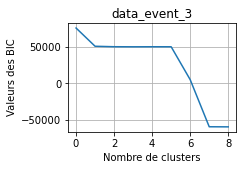

1 228006.40562189269
2 163540.70220481008
3 161118.45974996663
4 158143.88892085935
5 116559.02721242086
6 115321.34032363014
7 114144.52912108492
8 113818.15205835717
9 113270.92182243204


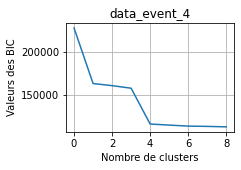

1 85925.57781395876
2 43414.82660682571
3 67017.70350849367
4 66785.64531229569
5 26186.27587862475
6 31585.202032540637
7 31303.8253570693
8 55104.30099141243
9 -3071.5840231713537


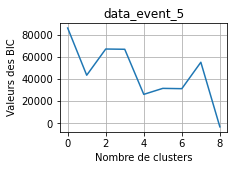

1 149263.88874113178
2 105950.45790227885
3 96852.13948754309
4 96675.60581387502
5 96546.72254252617
6 96515.55161302202
7 94070.47951052437
8 92537.02961022443
9 92421.59818427033


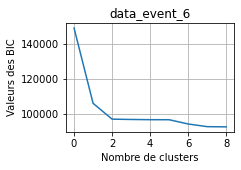

1 111346.29145138773
2 23502.4600003996
3 12354.685094677443
4 7387.197518463507
5 7297.46721277256
6 6935.234361904148
7 6735.39710124824
8 6284.9779699837745
9 6259.758828540923


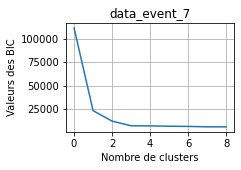

1 111630.34161518358
2 104472.31273955778
3 101192.69879223943
4 98147.3068640434
5 97408.59027243721
6 99120.89475756303
7 96058.11695012863
8 96929.45587235244
9 96968.42762444855


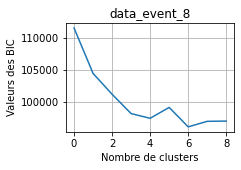

In [21]:
#BIC le plus petit ?
import numpy as np
from sklearn.mixture import GaussianMixture

for data_event in data_events :
    titre=str(data_event)
    data= concatenation_2_fichiers(data_event)
    X = np.array(data)[:, 0:1]

    listebic=[]

    for i in range(1, 10):
        gmmodel=GaussianMixture(n_components=i, random_state=0).fit(X)
        listebic.append(gmmodel.bic(X))
        print(i,gmmodel.bic(X))


    plt.figure(figsize=(3, 2))
    plt.plot(listebic)
    plt.grid()
    plt.title(titre)
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Valeurs des BIC')
    plt.show()

data_event_0 :

describe xtime :
 count    17196.000000
mean       159.161084
std         32.432261
min         14.000000
25%        148.000000
50%        166.000000
75%        181.000000
max        386.000000
Name: xtime, dtype: float64
classes : [0 1 2 3 4]
shape : (17196, 24)


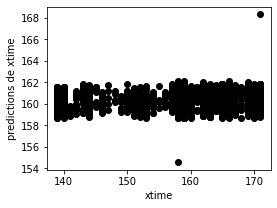

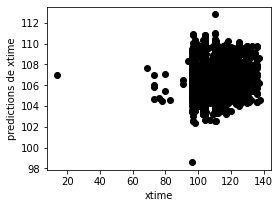

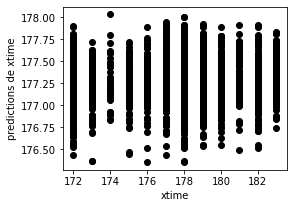

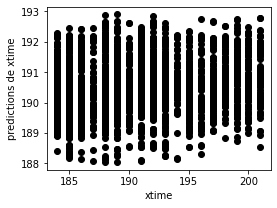

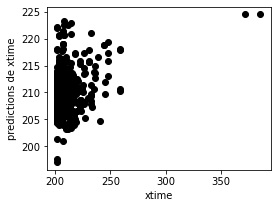

None
data_event_1 :

describe xtime :
 count    13954.000000
mean        36.934069
std         12.947377
min         12.000000
25%         40.000000
50%         41.000000
75%         42.000000
max        103.000000
Name: xtime, dtype: float64
classes : [0 1 2 3 4 5 6]
shape : (13954, 24)


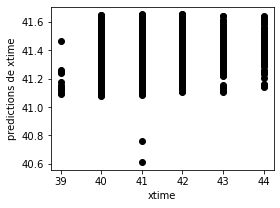

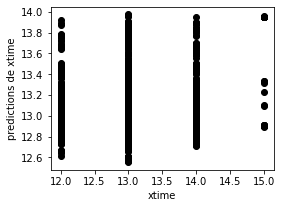

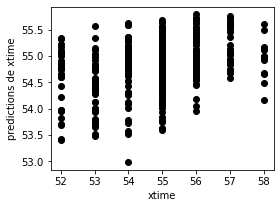

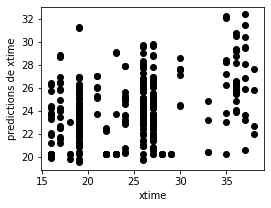

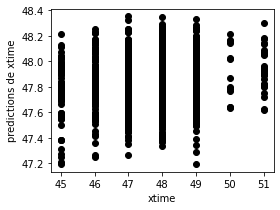

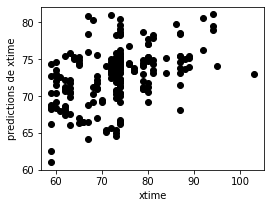

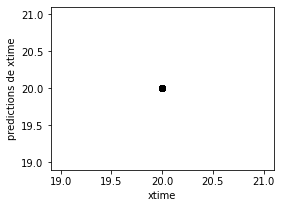

None
data_event_2 :

describe xtime :
 count    13851.000000
mean       237.160855
std        323.846945
min          7.000000
25%         58.000000
50%         65.000000
75%        492.000000
max       2869.000000
Name: xtime, dtype: float64
classes : [0 1 2 3]
shape : (13851, 24)


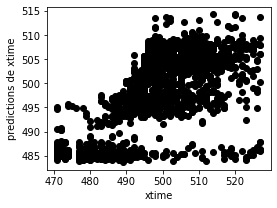

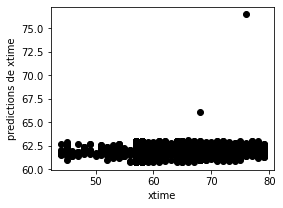

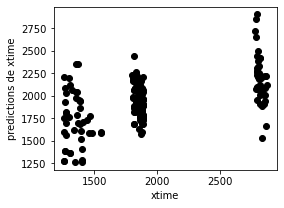

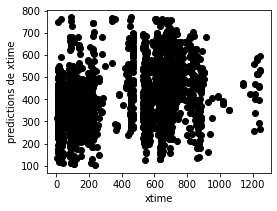

None
data_event_3 :

describe xtime :
 count    12849.000000
mean        30.755934
std          4.683828
min          8.000000
25%         30.000000
50%         30.000000
75%         31.000000
max         78.000000
Name: xtime, dtype: float64
classes : [0 1 2 3 4 5 6]
shape : (12849, 24)


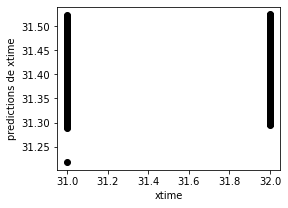

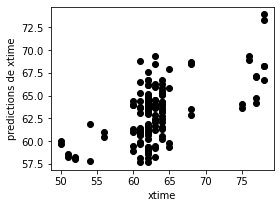

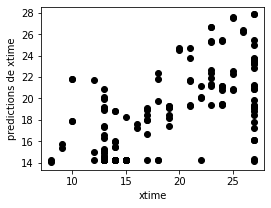

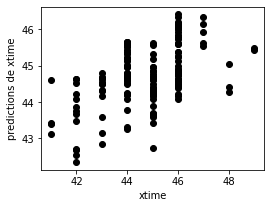

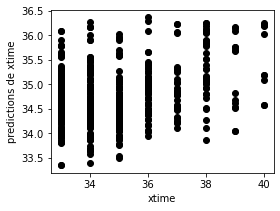

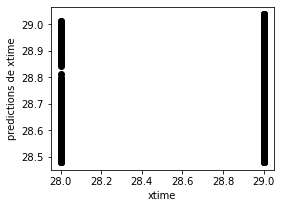

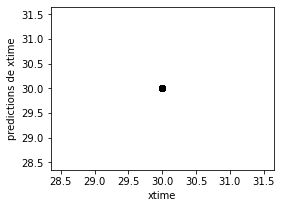

None
data_event_4 :

describe xtime :
 count    14615.000000
mean       249.556209
std        590.437585
min          8.000000
25%         14.000000
50%         71.000000
75%         73.000000
max       2877.000000
Name: xtime, dtype: float64
classes : [0 1 2 3]
shape : (14615, 24)


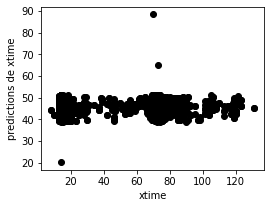

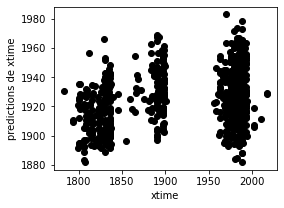

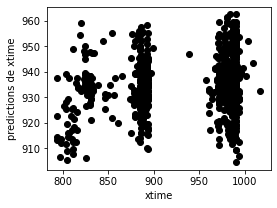

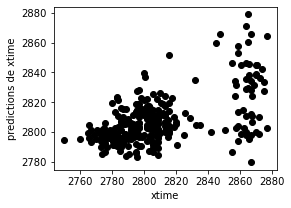

None
data_event_5 :

describe xtime :
 count    12120.000000
mean        20.401733
std          8.373831
min          9.000000
25%         11.000000
50%         22.000000
75%         27.000000
max        177.000000
Name: xtime, dtype: float64
classes : [0 1 2 3 4 5 6 7]
shape : (12120, 24)


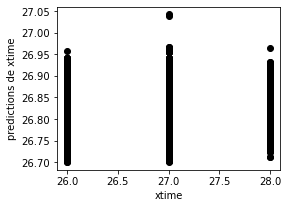

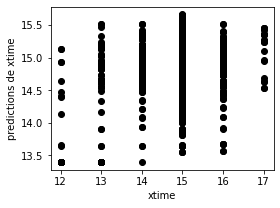

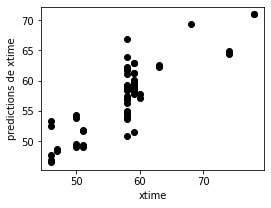

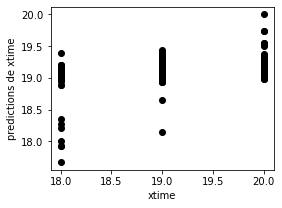

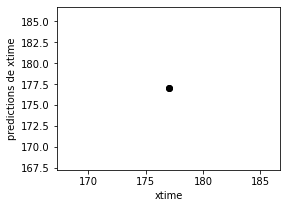

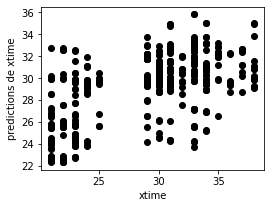

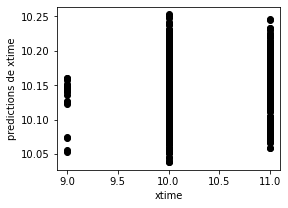

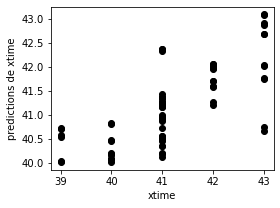

None
data_event_6 :

describe xtime :
 count    12416.000000
mean       131.812419
std         98.621730
min         10.000000
25%         14.000000
50%        200.000000
75%        218.000000
max        477.000000
Name: xtime, dtype: float64
classes : [0 1]
shape : (12416, 24)


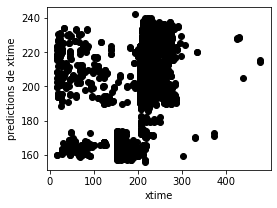

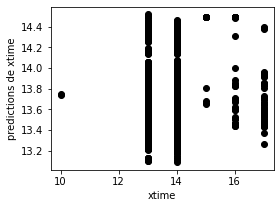

None
data_event_7 :

describe xtime :
 count    10753.000000
mean        61.572863
std         42.849633
min         13.000000
25%         13.000000
50%         89.000000
75%         92.000000
max        741.000000
Name: xtime, dtype: float64
classes : [0 1]
shape : (10753, 24)


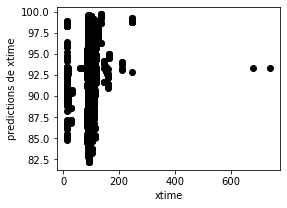

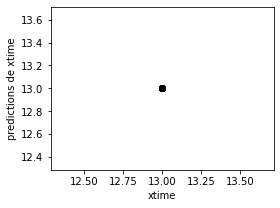

None
data_event_8 :

describe xtime :
 count    10775.000000
mean        97.059211
std         42.961674
min          9.000000
25%         43.000000
50%        111.000000
75%        131.000000
max        294.000000
Name: xtime, dtype: float64
classes : [0 1 2]
shape : (10775, 24)


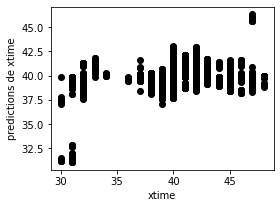

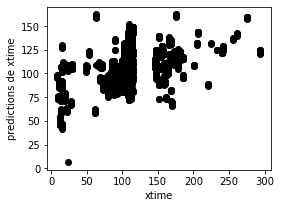

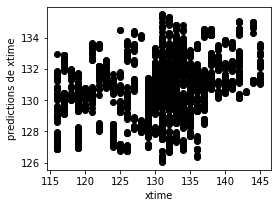

None


In [26]:
def creation_classes_gmm(data, nombre_classes_1):  
    import matplotlib.pyplot as plt
    from sklearn import mixture
    from sklearn.linear_model import LinearRegression

    data=data.copy()
    
    x=data.values[:,0].reshape(-1, 1)

    # classification GMM en 6 classes
    g = mixture.GaussianMixture(n_components=nombre_classes_1,covariance_type='full')
    g.fit(x)
    data['classes']= g.predict(x)
    
    return data, nombre_classes_1

def regression_lineaire(data, nombre_classes_1):    
    import matplotlib.pyplot as plt
    from sklearn import mixture
    from sklearn.linear_model import LinearRegression

    data=creation_classes_gmm(data, nombre_classes_1)[0]
    nombre_classes_1=creation_classes_gmm(data, nombre_classes_1)[1]
    
    print("describe xtime :\n",data["xtime"].describe())
    print("classes :",np.unique(data["classes"]))
    print("shape :",data.shape)

    
    for d in [data[data["classes"]==i] for i in range(nombre_classes_1)]:
        
        # X est les valeurs d un dataframe composé des variable hors xtime(1) et hors classes(-1)
        X=d.values[:,1:-1]
        
        # en abscisse = xtime originaux
        y=d.values[:,0]

        # regression lineaire sur xtime y selon les variables dans X
        lmodellineaire = LinearRegression()
        lmodellineaire.fit(X,y)
        # en ordonnee = xtime predits 
        y_predict = lmodellineaire.predict(X) 
              
            
        plt.figure('Linear model plot', figsize=(4,3))
        plt.scatter(y, y_predict,  color='black')
        plt.ylabel("predictions de xtime")
        plt.xlabel("xtime")    
        plt.show()
    
import itertools 
nombredeclasses1 = [5,7,4,7,4,
                    8,2,2,3]

for n1,n_event in zip(nombredeclasses1, data_events): 
    print(n_event, ":\n")
    print(regression_lineaire(concatenation_2_fichiers(n_event), n1))

data_event_0 :

Plus gros coefficients de correlation (abs) :
 alt                      0.036248
alt_ellipsoid            0.036248
baro_temp_celcius        0.035565
rho                      0.035446
baro_pressure_pa         0.035437
baro_alt_meter           0.035411
magnetometer_ga[1]       0.029093
vel_m_s                  0.019997
accelerometer_m_s2[0]    0.017566
cog_rad                  0.013361
gyro_rad[1]              0.010489
vel_d_m_s                0.009551
vel_e_m_s                0.007752
magnetometer_ga[0]       0.007065
gyro_rad[2]              0.004768
gyro_rad[0]              0.004696
lon                      0.004090
accelerometer_m_s2[2]    0.003698
vel_n_m_s                0.003350
lat                      0.001579
magnetometer_ga[2]       0.000992
accelerometer_m_s2[1]    0.000003
Name: xtime, dtype: float64


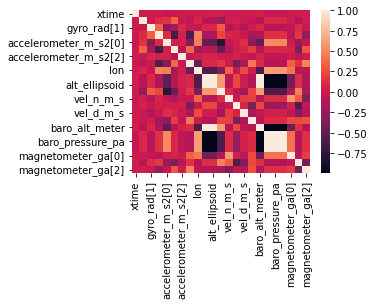

data_event_1 :

Plus gros coefficients de correlation (abs) :
 lon                      0.075977
lat                      0.063900
gyro_rad[2]              0.062371
cog_rad                  0.059686
vel_d_m_s                0.042532
accelerometer_m_s2[0]    0.022194
gyro_rad[1]              0.017490
accelerometer_m_s2[2]    0.016356
magnetometer_ga[0]       0.015715
gyro_rad[0]              0.015529
vel_n_m_s                0.012887
magnetometer_ga[2]       0.012184
alt_ellipsoid            0.011969
alt                      0.011969
magnetometer_ga[1]       0.011366
baro_temp_celcius        0.009266
vel_e_m_s                0.009171
rho                      0.008992
baro_pressure_pa         0.008978
baro_alt_meter           0.008941
accelerometer_m_s2[1]    0.007111
vel_m_s                  0.006968
Name: xtime, dtype: float64


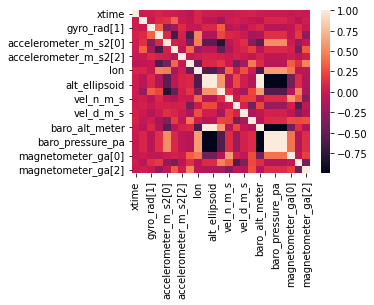

data_event_2 :

Plus gros coefficients de correlation (abs) :
 magnetometer_ga[0]       0.058247
alt                      0.055369
alt_ellipsoid            0.055369
baro_temp_celcius        0.055092
baro_alt_meter           0.054734
baro_pressure_pa         0.054718
rho                      0.054713
vel_m_s                  0.037685
lon                      0.037275
accelerometer_m_s2[0]    0.033424
magnetometer_ga[2]       0.031718
magnetometer_ga[1]       0.031517
vel_e_m_s                0.019339
gyro_rad[0]              0.016325
accelerometer_m_s2[2]    0.014055
lat                      0.009766
cog_rad                  0.008876
gyro_rad[2]              0.007533
accelerometer_m_s2[1]    0.004406
vel_n_m_s                0.004071
vel_d_m_s                0.002872
gyro_rad[1]              0.001977
Name: xtime, dtype: float64


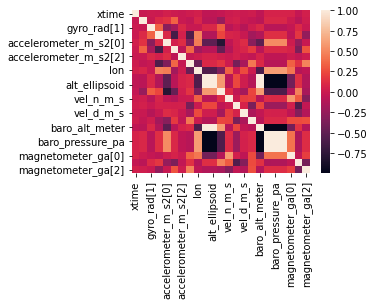

data_event_3 :

Plus gros coefficients de correlation (abs) :
 rho                      0.094361
baro_pressure_pa         0.094340
baro_temp_celcius        0.094295
baro_alt_meter           0.094294
alt                      0.092647
alt_ellipsoid            0.092647
magnetometer_ga[1]       0.069826
vel_m_s                  0.059781
accelerometer_m_s2[0]    0.041406
lon                      0.026757
vel_n_m_s                0.025034
vel_d_m_s                0.023459
cog_rad                  0.017775
gyro_rad[0]              0.017133
gyro_rad[1]              0.015420
accelerometer_m_s2[1]    0.014278
lat                      0.011042
gyro_rad[2]              0.007288
vel_e_m_s                0.006071
accelerometer_m_s2[2]    0.003824
magnetometer_ga[0]       0.001014
magnetometer_ga[2]       0.000333
Name: xtime, dtype: float64


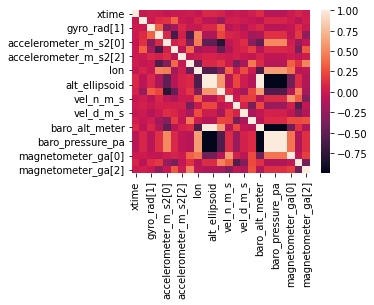

data_event_4 :

Plus gros coefficients de correlation (abs) :
 baro_temp_celcius        0.188620
rho                      0.188478
baro_pressure_pa         0.188475
baro_alt_meter           0.188471
alt                      0.187936
alt_ellipsoid            0.187936
vel_m_s                  0.138860
accelerometer_m_s2[0]    0.106477
magnetometer_ga[0]       0.102864
lon                      0.090388
magnetometer_ga[1]       0.085707
accelerometer_m_s2[1]    0.053035
magnetometer_ga[2]       0.031891
gyro_rad[1]              0.024823
gyro_rad[2]              0.017143
gyro_rad[0]              0.013680
vel_n_m_s                0.011113
vel_d_m_s                0.009801
cog_rad                  0.008971
vel_e_m_s                0.008312
accelerometer_m_s2[2]    0.005808
lat                      0.001629
Name: xtime, dtype: float64


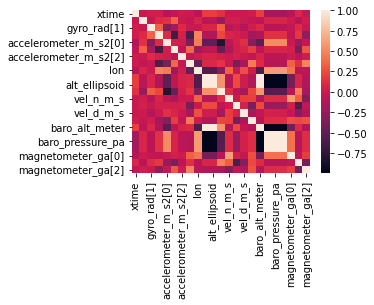

data_event_5 :

Plus gros coefficients de correlation (abs) :
 rho                      0.158850
baro_pressure_pa         0.158844
baro_alt_meter           0.158838
alt                      0.158695
alt_ellipsoid            0.158695
baro_temp_celcius        0.158464
vel_m_s                  0.102591
magnetometer_ga[0]       0.092284
accelerometer_m_s2[0]    0.088387
lon                      0.078112
magnetometer_ga[1]       0.059403
gyro_rad[0]              0.027725
accelerometer_m_s2[1]    0.024670
magnetometer_ga[2]       0.024635
gyro_rad[1]              0.019905
vel_e_m_s                0.016683
cog_rad                  0.016378
accelerometer_m_s2[2]    0.006920
lat                      0.005666
vel_n_m_s                0.004734
gyro_rad[2]              0.003933
vel_d_m_s                0.003590
Name: xtime, dtype: float64


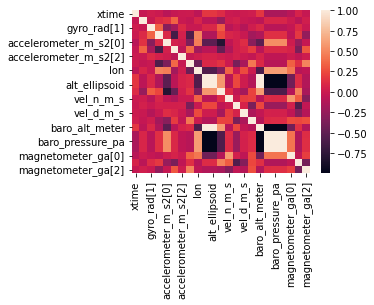

data_event_6 :

Plus gros coefficients de correlation (abs) :
 alt                      0.179414
alt_ellipsoid            0.179414
rho                      0.178664
baro_pressure_pa         0.178661
baro_alt_meter           0.178654
baro_temp_celcius        0.178091
lon                      0.142500
magnetometer_ga[0]       0.126299
vel_m_s                  0.123959
accelerometer_m_s2[0]    0.086924
magnetometer_ga[2]       0.083421
magnetometer_ga[1]       0.077106
accelerometer_m_s2[1]    0.063695
cog_rad                  0.045034
gyro_rad[0]              0.033692
vel_e_m_s                0.022393
gyro_rad[2]              0.018992
vel_d_m_s                0.017928
vel_n_m_s                0.015713
gyro_rad[1]              0.014087
lat                      0.008745
accelerometer_m_s2[2]    0.004100
Name: xtime, dtype: float64


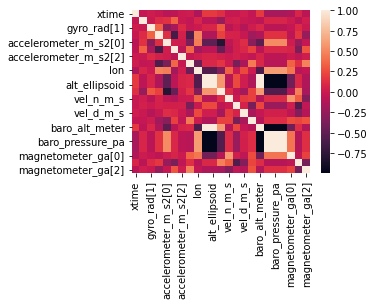

data_event_7 :

Plus gros coefficients de correlation (abs) :
 cog_rad                  0.061165
gyro_rad[0]              0.052315
accelerometer_m_s2[1]    0.047015
vel_e_m_s                0.042630
vel_d_m_s                0.030264
magnetometer_ga[2]       0.022160
baro_temp_celcius        0.015622
rho                      0.015166
baro_pressure_pa         0.015165
baro_alt_meter           0.015143
magnetometer_ga[0]       0.014833
alt                      0.012626
alt_ellipsoid            0.012626
vel_n_m_s                0.012182
lat                      0.009764
gyro_rad[1]              0.008674
accelerometer_m_s2[2]    0.007705
vel_m_s                  0.007307
lon                      0.007266
accelerometer_m_s2[0]    0.006166
magnetometer_ga[1]       0.004993
gyro_rad[2]              0.004378
Name: xtime, dtype: float64


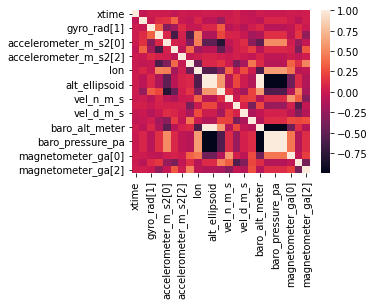

data_event_8 :

Plus gros coefficients de correlation (abs) :
 vel_m_s                  0.488475
vel_d_m_s                0.478459
magnetometer_ga[1]       0.444825
accelerometer_m_s2[0]    0.377611
lon                      0.353514
baro_temp_celcius        0.262706
rho                      0.259584
baro_pressure_pa         0.259577
baro_alt_meter           0.259567
lat                      0.256493
alt                      0.229959
alt_ellipsoid            0.229959
accelerometer_m_s2[1]    0.209119
cog_rad                  0.170630
vel_e_m_s                0.127975
gyro_rad[0]              0.123920
gyro_rad[1]              0.119493
magnetometer_ga[2]       0.117711
vel_n_m_s                0.034392
magnetometer_ga[0]       0.027603
accelerometer_m_s2[2]    0.021616
gyro_rad[2]              0.004913
Name: xtime, dtype: float64


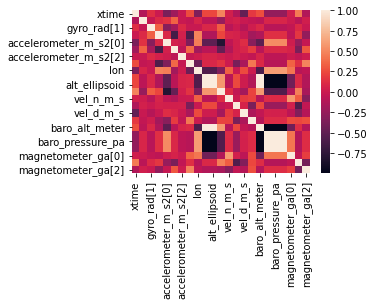

In [27]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt


for data_event in data_events :
    data= concatenation_2_fichiers(data_event)   
    
    taile_moitie=round(len(data.columns)/2) 
    
    print(data_event, ":\n")
    
    print("Plus gros coefficients de correlation (abs) :\n",
          abs(data.corr()["xtime"]).sort_values(ascending = False)[1:])
    
    plt.figure(figsize=(4,3))
    sns.heatmap(data.corr()) 
    plt.show()

classes
0    30.447408
1    35.323493
Name: xtime, dtype: float64


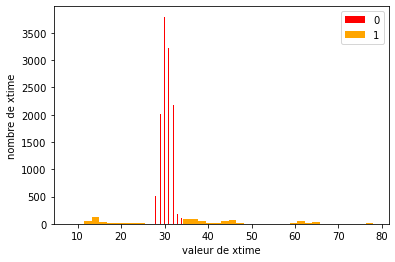

classes
0    30.211684
1    44.456250
2    63.408451
Name: xtime, dtype: float64


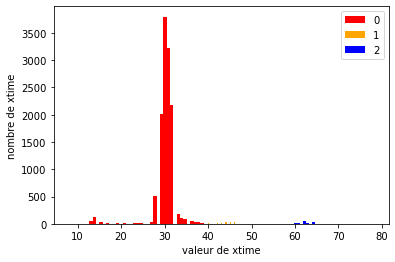

classes
0    63.753623
1    30.447408
2    13.890830
3    37.531390
Name: xtime, dtype: float64


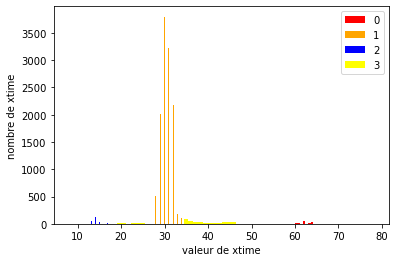

classes
0    31.453094
1    63.753623
2    13.890830
3    36.863636
4    29.507315
Name: xtime, dtype: float64


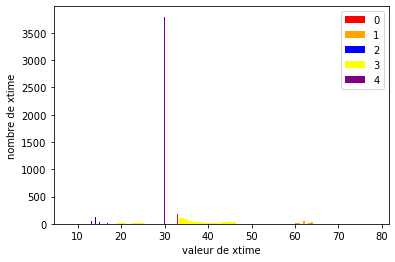

classes
0    28.798104
1    63.753623
2    13.890830
3    31.402963
4    35.576159
5    30.000000
Name: xtime, dtype: float64


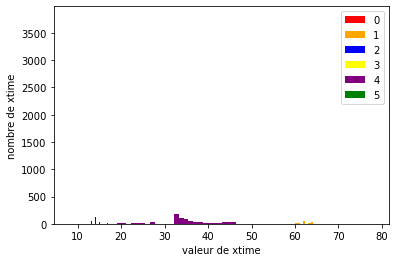

classes
0    29.507315
1    62.520325
2    15.339223
3    31.453094
4    44.740964
5    35.530120
6    76.923077
Name: xtime, dtype: float64


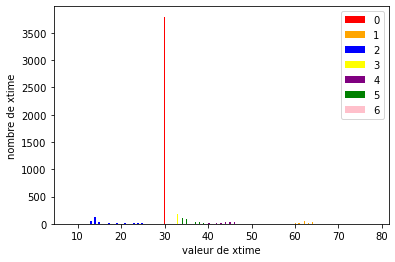

classes
0    52.000000
1    29.507315
2    15.339223
3    62.628099
4    31.453094
5    35.660819
6    76.923077
7    44.623288
Name: xtime, dtype: float64


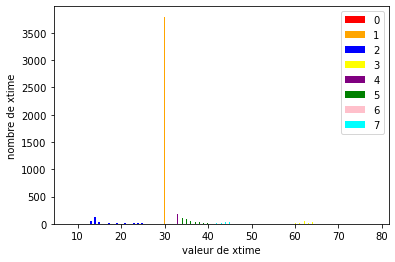

classes
0    30.000000
1    62.520325
2    16.456869
3    44.294444
4    32.000000
5    34.533469
6    28.798104
7    76.923077
8    31.000000
Name: xtime, dtype: float64


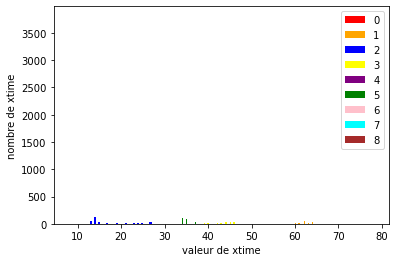

In [37]:
for clustering in range (2,10):
    data=creation_classes_gmm(concatenation_2_fichiers("data_event_3"), clustering)[0]

    liste_classes=np.sort(np.unique(data["classes"]))
    palette=["red","orange", "blue", 
             "yellow", "purple", "green",
            "pink", "cyan", "brown"]

    print(data.groupby(['classes'])['xtime'].mean())
    for numero_classe,couleur in zip(liste_classes, 
                                     palette): 
        plt.hist(np.array( data.loc[data["classes"]==numero_classe]["xtime"] ), label=numero_classe, bins=40, color=couleur)


    plt.legend()
    plt.xlabel("valeur de xtime")
    plt.ylabel("nombre de xtime")
    plt.show()